# Hydrogenic single solution Schrodinger equation

In [1]:
using Pkg;
Pkg.activate("../../SchrodingerEquationSolver");
include("../src/SchrodingerEquationSolver.jl");
import .SchrodingerEquationSolver as ses
import .ses.Grids as Grids
import .ses.Potentials as Potentials
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
import .ses.InitialConditions as InitialConditions
import .ses.OneDSchrodingerEquationSolver as odses
import .ses.EigenvalueFinders as EigenvalueFinders
import .ses.IntegralNumericalMethods as IntegralNumericalMethods
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
using Plots

  Activating project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver`


In [2]:
#Define parameters and produce an exponential grid.

r_max::Float64=50.0;
Z::Int64=3; #Atomic number, also used as the charge of coulomb potential.
grid= ses.Grids.exponential_grid(r_max, Z);
a::Float64=(4.34e-6)/Float64(Z);
b::Float64=0.002304;


In [3]:
N= size(grid)[1];
println(N)


7534


In [4]:
grid_uni= ses.Grids.uniform_grid(1.0e-8, r_max, 10000);
N_uni= size(grid_uni)[1];
println(N_uni)

10000


In [5]:
hu= Hydrogen.u_s1_hydrogen(grid);
hu_uni= Hydrogen.u_s1_hydrogen(grid_uni);

In [6]:
grid_i::Vector{Float64}=[Float64(i) for (i,_) in enumerate(grid)];
N_i=size(grid_i)[1];

In [7]:
#Definition of the potentials with angular quantum number 0 
l::Int64=0;
v_colu= Potentials.coulomb_potential(Z, grid);
v_angu= Potentials.angular_potential(l, grid);
v_effe= v_colu + v_angu;

v_colu_uni= Potentials.coulomb_potential(Z, grid_uni);
v_angu_uni= Potentials.angular_potential(l, grid_uni);
v_effe_uni= v_colu_uni + v_angu_uni;

In [8]:
n::Float64=2.0; #shell level
E= -0.5*(Z^2 / n^2); #Energy of hydrogenic atom
#Definition of initial conditions
init_valu1_fwrd, init_valu2_fwrd,
init_valu1_bwrd, init_valu2_bwrd =InitialConditions.atom(grid, E, l);

function initial value3.336962704870589e-9
function derivative initial value1.0
+++++++++++++++++++++++++++++++++++++


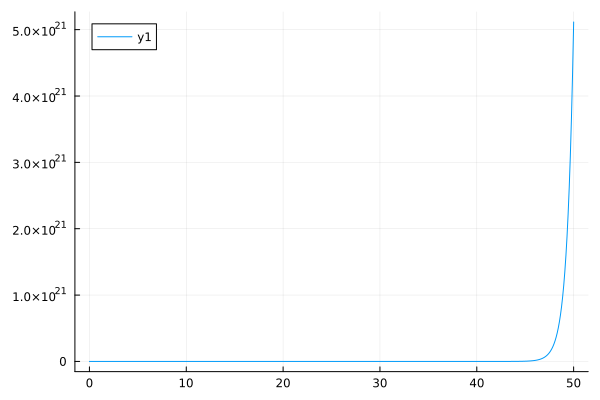

In [9]:
u_1= InitialConditions.u_r_near_0(grid, 1, l);
du_1= InitialConditions.du_dr_near_0(grid,1, l);
f::Vector{Float64}= 2.0.*(v_effe .- E);
g=zeros(Float64, size(f)[1]);
u_fwd_p= IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5_direct_initial(grid,g,f,
u_1,du_1);
plot(grid, u_fwd_p)

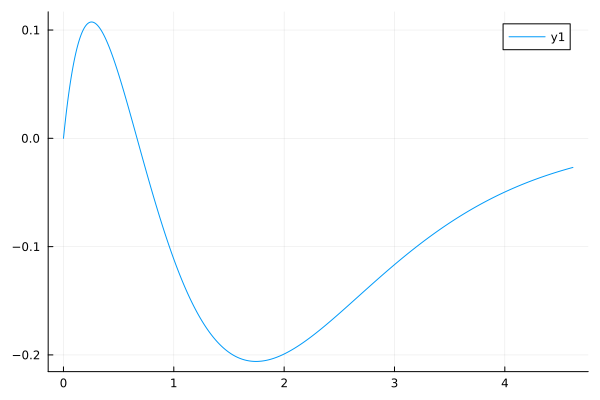

In [10]:
plot(grid[1:6500], u_fwd_p[1:6500])

In [11]:
v_1= InitialConditions.v_i_near_0(grid, 1, l, b);
dv_1= InitialConditions.dv_di_near_0(grid,1, l, a, b);
println(v_1)
println(dv_1)

3.3331207372328283e-9
3.333122211698687e-9


function initial value3.3331207372328283e-9
function derivative initial value3.333122211698687e-9
+++++++++++++++++++++++++++++++++++++


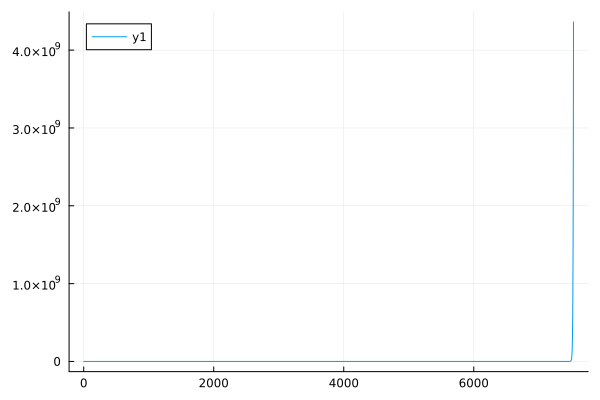

In [12]:
fv::Vector{Float64}= ((a*b.*exp.(b.*grid_i)).^2).*f .+ 0.25*b^2;
gv=zeros(Float64, size(fv)[1]);
v_fwd= IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5_direct_initial(grid_i,gv,fv,
v_1,dv_1);
plot(grid_i, v_fwd)

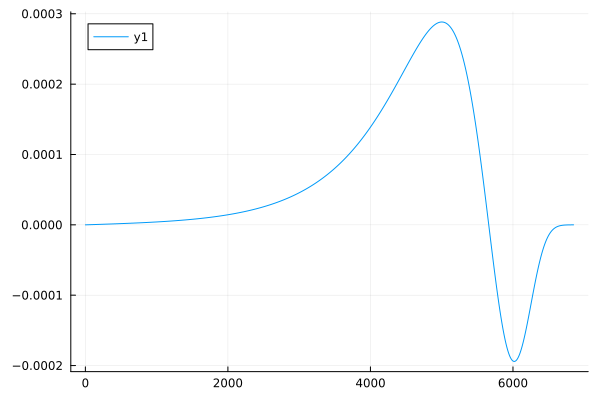

In [19]:
plot(grid_i[1:6850], v_fwd[1:6850])

function initial value2.6657165050879636e-33
function derivative initial value-3.998574757631945e-33
+++++++++++++++++++++++++++++++++++++


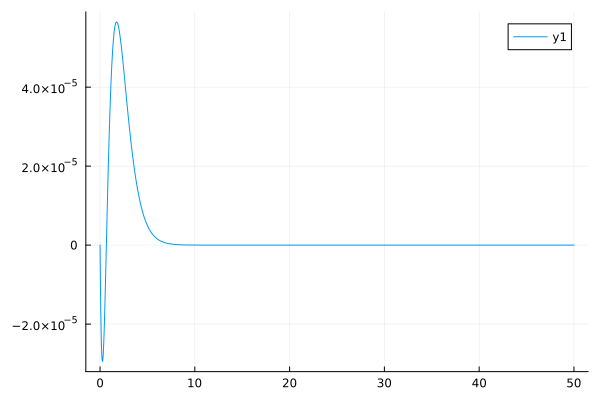

In [13]:
u_end= InitialConditions.u_r_end(grid, E);
du_end= InitialConditions.du_dr_end(grid, E);
u_bwd_p= reverse(IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5_direct_initial(reverse(grid),g,reverse(f),
u_end,du_end));
plot(grid, u_bwd_p)

4.534184532190719e-37
-7.887810024869356e-38
function initial value4.534184532190719e-37
function derivative initial value-7.887810024869356e-38
+++++++++++++++++++++++++++++++++++++


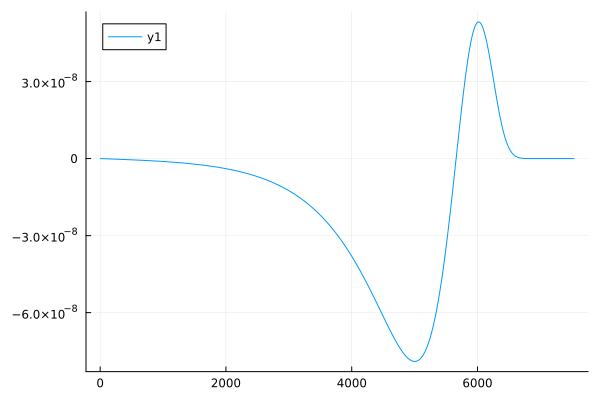

In [14]:
end_i= size(grid_i)[1];
v_end= InitialConditions.v_i_end(grid, E, b,end_i);
dv_end= InitialConditions.dv_di_end(grid, E, a, b, end_i);
println(v_end)
println(dv_end)
v_bwd= reverse(IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5_direct_initial(reverse(grid_i),gv,reverse(fv),
v_end,dv_end));
plot(grid_i, v_bwd)

9.999362211698485e-9
9.99936663509606e-9


function initial value1.0010888014393886e-8
function derivative initial value0.9999999699442443
+++++++++++++++++++++++++++++++++++++


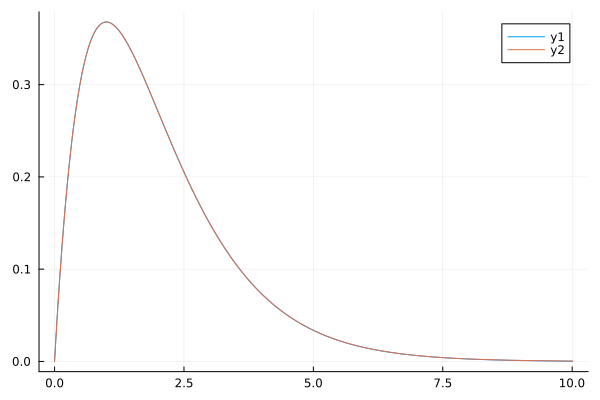

In [16]:
f::Vector{Float64}= 2.0.*(v_effe .- E);
g=zeros(Float64, size(f)[1]);
u_fwd= IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5(grid,g,f,
hu[1],(hu[2]);
plot(grid, [u_fwd, hu])


In [12]:
error= sum(abs.(abs.(u_fwd) .- abs.(hu)))/N;
println(error)

2.5564495570642295e-6


function initial value1.0010888114611767e-8
function derivative initial value1.0
+++++++++++++++++++++++++++++++++++++


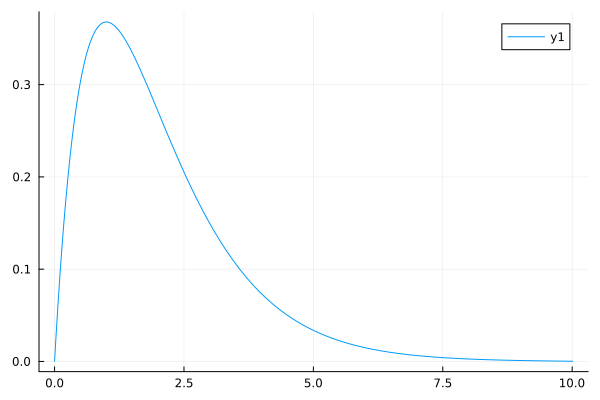

In [9]:
u_1= InitialConditions.u_r_near_0(grid, 1, l);
du_1= InitialConditions.du_dr_near_0(grid,1, l);
u_fwd_p= IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5_direct_initial(grid,g,f,
u_1,du_1);
plot(grid, u_fwd_p)

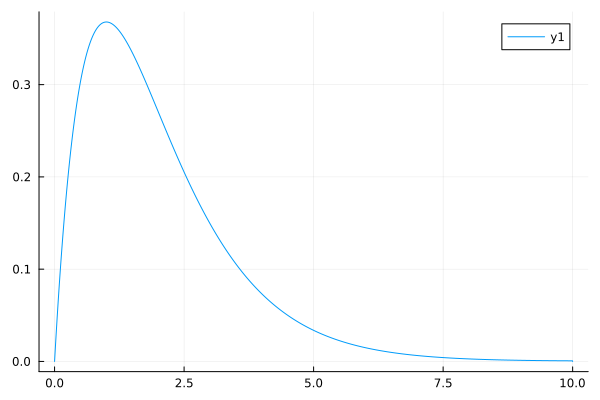

In [24]:
f_uni::Vector{Float64}= 2.0.*(v_effe_uni .- E);
g_uni=zeros(Float64, size(f_uni)[1]);

u_1= InitialConditions.u_r_near_0(grid_uni, 1, l);
u_2= InitialConditions.u_r_near_0(grid_uni, 2, l);
u_fwd_uni= IntegralNumericalMethods.integrate_second_order_DE_Numerov(grid_uni,g_uni,f_uni,
hu_uni[1],hu_uni[2]);
plot(grid_uni, u_fwd_uni)


In [25]:
error_uni= sum(abs.(abs.(u_fwd_uni) .- abs.(hu_uni)))/N_uni;
println(error_uni)

2.4036107514683823e-5


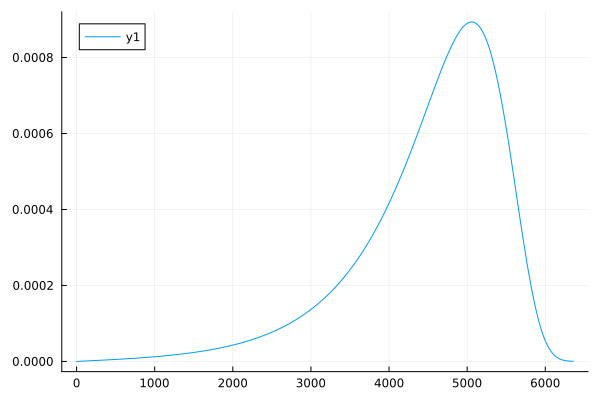

In [18]:
hu_v= hu.*exp.(-0.5*b.*grid_i);
plot(grid_i, hu_v)

function initial value9.999362111595989e-9
function derivative initial value9.999375181123865e-9
+++++++++++++++++++++++++++++++++++++


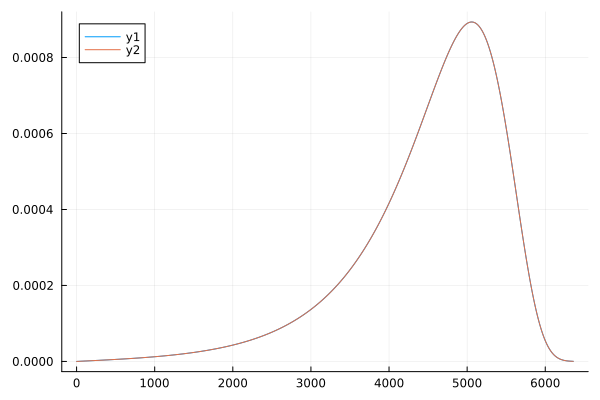

In [36]:
fv::Vector{Float64}= ((a*b.*exp.(b.*grid_i)).^2).*f .+ 0.25*b^2;
gv=zeros(Float64, size(fv)[1]);
v_fwd= IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5(grid_i,gv,fv,
hu_v[1],hu_v[2]);
plot(grid_i, [v_fwd, hu_v])

In [39]:
error_v= sum(abs.(abs.(v_fwd) .- abs.(hu_v)))/N_i;
println(error_v)

2.1849029209097407e-10


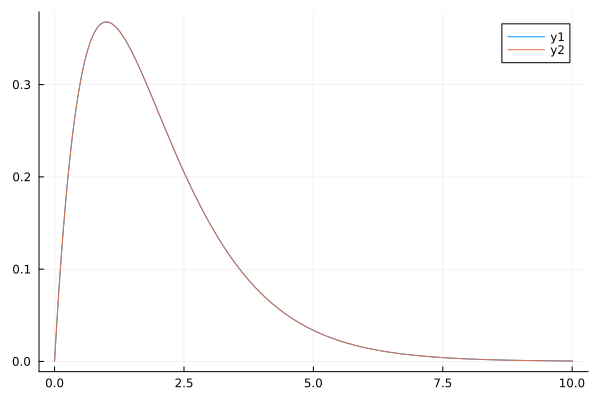

In [40]:
u_from_v= v_fwd.*exp.(0.5*b.*grid_i);
plot(grid, [u_from_v, hu])

In [41]:
error_from_v= sum(abs.(abs.(u_from_v) .- abs.(hu)))/N;
println(error_from_v)

5.9445366696337175e-8


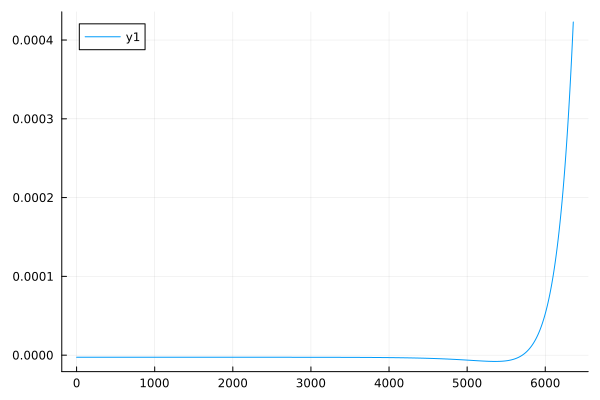

In [20]:
plot(grid_i, fv)

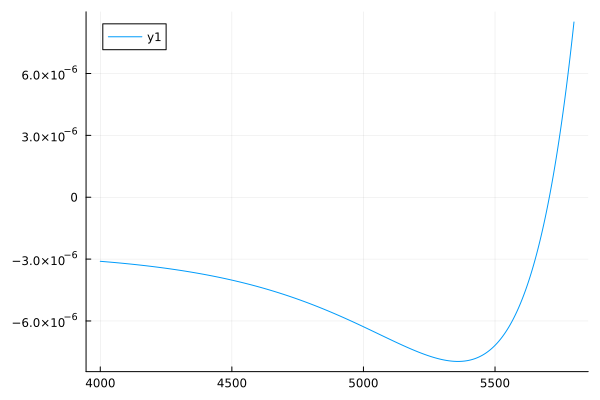

In [22]:
plot(grid_i[4000:5800], fv[4000:5800])

function initial value2.9650093661035325e-7
function derivative initial value-6.559702513184974e-9
+++++++++++++++++++++++++++++++++++++


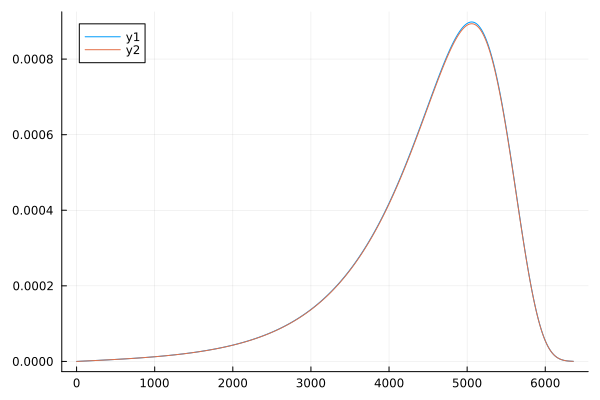

In [37]:
v_bwd=reverse(IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5(reverse(grid_i),gv,reverse(fv),
hu_v[end],hu_v[end-1]));
plot(grid_i, [v_bwd, hu_v])

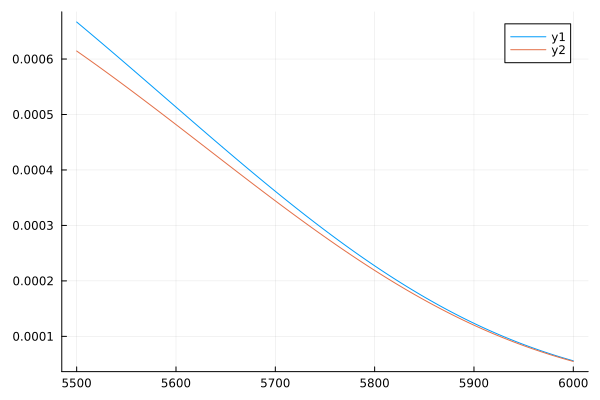

In [35]:
plot(grid_i[5500:6000], [v_bwd[5500:6000], hu_v[5500:6000]])

function initial value2.9650093661035325e-7
function derivative initial value-6.559702513184974e-9
+++++++++++++++++++++++++++++++++++++


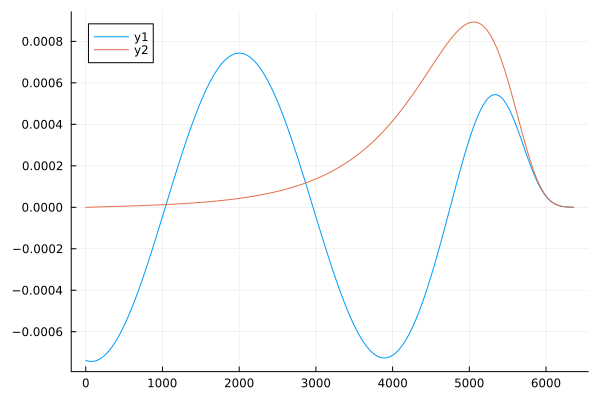

In [30]:

v_fbwd= reverse(IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5(reverse(grid_i),gv,reverse(fv),
hu_v[end],hu_v[end-1]));
plot(grid_i, [v_fbwd, hu_v])

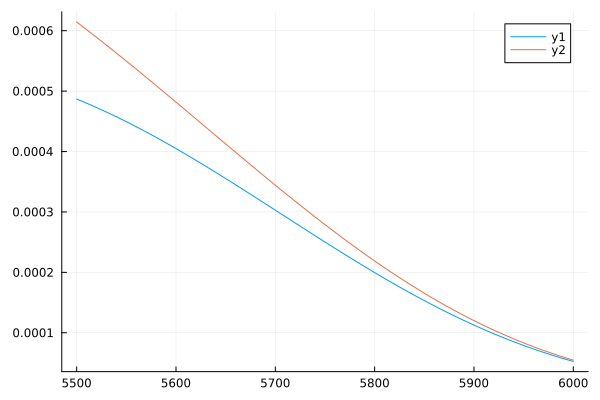

In [31]:
plot(grid_i[5500:6000], [v_fbwd[5500:6000], hu_v[5500:6000]])

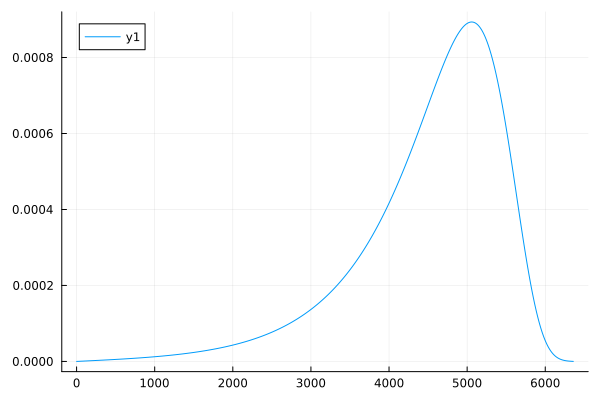

In [11]:
vi_target= u_fwd_p.*exp.((-0.5*b).*grid_i);
plot(grid_i, vi_target)

In [11]:
vi_target[1:5]

5-element Vector{Float64}:
 9.999362211698485e-9
 1.9998737584743132e-8
 2.999813928560912e-8
 3.999758059083451e-8
 4.999707477198579e-8

In [13]:
vi_target[2] - vi_target[1]

9.999375373044647e-9

9.999362211698485e-9
9.99936663509606e-9
function initial value9.999362211698485e-9
function derivative initial value9.99936663509606e-9
+++++++++++++++++++++++++++++++++++++


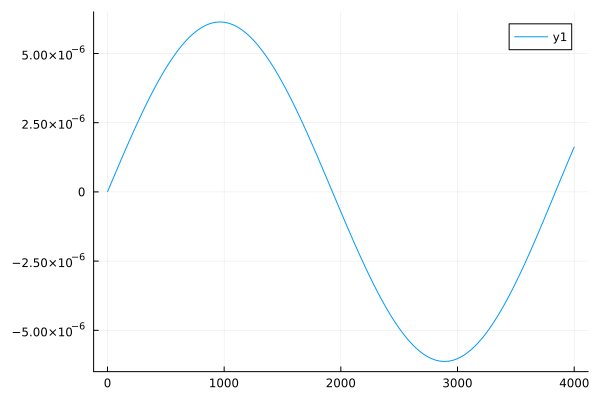

In [14]:
v_end= InitialConditions.v_i_near_0(grid, 1, l, b);
dv_1= InitialConditions.dv_di_near_0(grid,1, l, a, b);
fv_i= ((a*b.*exp.(b.*grid_i)).^2).*f .- 0.5*b^2;
println(v_1)
println(dv_1)
v= IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5_direct_initial(grid_i,g,fv_i,
v_1,dv_1);
plot(grid_i[1:4000], v[1:4000])

In [6]:
print(init_valu1_fwrd)

1.0010888114611767e-9

In [7]:
E=ei

-50.0

In [8]:
f::Vector{Float64}= 2.0.*(v_effe .- E);
g=zeros(Float64, size(f)[1]);
#fp= ((a^2)*(b^2)).*exp.((2.0*b).*grid_i).*f .- (b^2)/(2.0);
fp= (b^2).*((a^2).*exp.((2.0*b).*grid_i).*f .- 0.5);
init_valu1_fwrd_v=init_valu1_fwrd;#*exp(-0.5*b*grid_i[1]);
init_valu2_fwrd_v=init_valu2_fwrd;#*exp(-0.5*b*grid_i[2]);
init_valu1_bwrd_v=init_valu1_bwrd;#*exp(-0.5*b*grid_i[end]);
init_valu2_bwrd_v=init_valu2_bwrd;#*exp(-0.5*b*grid_i[end-1]);
#find turn_pnts of of f, basically the clasical turning points of the effective density_potential
#with restepect to the E proposed eigenvalue
turn_pnts= MathUtils.indices_of_zeros_finder(f);
if length(turn_pnts) ==  0
    throw(DomainError("the effective potential has no turning points 
    for the proposed energy eigenvalue, this means v_effe - E has no zeroes"));
end

#do forward integration of radial shcrodinger equation u
v_fwd= IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5(grid_i,g,fp,
init_valu1_fwrd_v,init_valu2_fwrd_v);
#do backward integreation of the radial shcrodinger equation u 
#v_bwd= reverse(IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5(reverse(grid_i),g,reverse(fp),
#init_valu1_bwrd_v,init_valu2_bwrd_v));
v_bwd= reverse(IntegralNumericalMethods.integrate_second_order_DE_RK4_PCABM5(grid_i,g,reverse(fp),
init_valu1_bwrd_v,init_valu2_bwrd_v));
u_fwd= v_fwd.*exp.((0.5*b).*grid_i);
u_bwd= v_bwd.*exp.((0.5*b).*grid_i);
#rescale u_fwd, u_bwd to make u_fwd[turn_pnts[1]] = u_bwd[turn_pnts[1]]
#u_fwd, u_bwd= MathUtils.rescale!(u_fwd, u_bwd, turn_pnts[1]);
#merge solutions
#u_merged, merge_value= MathUtils.merge_solutions(u_fwd, u_bwd, grid, turn_pnts[1]);
#u_merged= MathUtils.normalize!(u_merged, grid);

function initial value1.0010888114611767e-9
function derivative initial value1.0033979792225306e-9
+++++++++++++++++++++++++++++++++++++
function initial value4.023862052798186e-9
function derivative initial value1.800842012072223e-10
+++++++++++++++++++++++++++++++++++++


6660-element Vector{Float64}:
 -0.15434889703835938
 -0.15455606920812207
 -0.15476310159912232
 -0.15496999361141958
 -0.15517674436327156
 -0.15538335286268723
 -0.1555898180625352
 -0.15579613888364072
 -0.15600231422616956
 -0.15620834297589026
  ⋮
  1.221508213208091e-5
  1.1702100405354725e-5
  1.120958860841877e-5
  1.073678408340358e-5
  1.0282950763668047e-5
  9.847378406738577e-6
  9.429381677337604e-6
  9.028299395102694e-6
  8.64349376573279e-6

In [19]:
temp=b^2*a^2*(exp.((2.0*b).*grid_i).*f) .- 0.5*b^2;

In [20]:
temp[1:10]

10-element Vector{Float64}:
 -2.6742759506065816e-6
 -2.6642767059819837e-6
 -2.6609437016031e-6
 -2.659277257470493e-6
 -2.658277437584726e-6
 -2.6576109299463636e-6
 -2.657134886555972e-6
 -2.6567778834141183e-6
 -2.6565002405213716e-6
 -2.6562781498783013e-6

In [12]:
f[1:10]

10-element Vector{Float64}:
 -1.997824735519656e10
 -9.977616162154678e9
 -6.644078329744961e9
 -4.977313837481955e9
 -3.9772586812641296e9
 -3.3105581930549884e9
 -2.8343460865503144e9
 -2.4771892185956244e9
 -2.1994025096586213e9
 -1.9771749120180242e9

In [9]:
l=5660;
h=100;
k=100;

In [13]:
grid[l]

0.19997088997360152

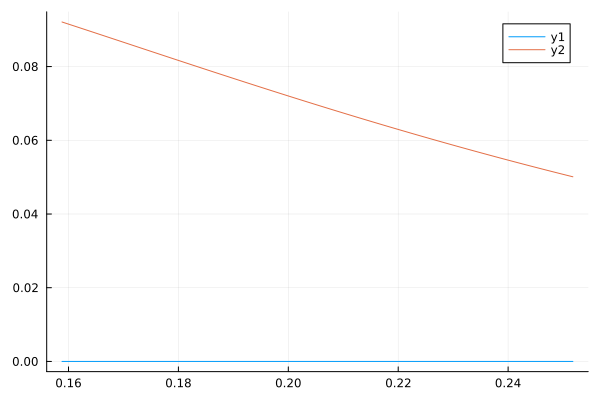

In [10]:

plot(grid[l-h:l+k], [v_fwd[l-h:l+k],v_bwd[l-h:l+k]])

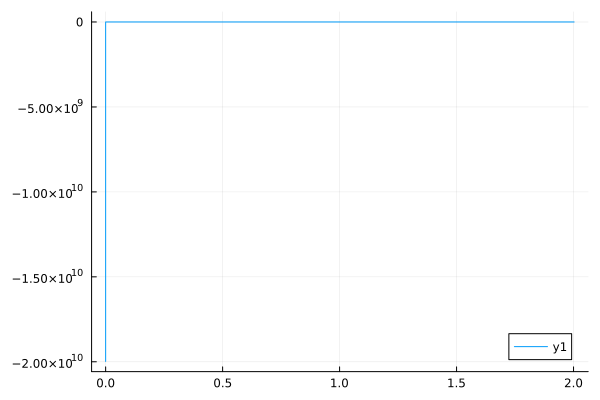

In [11]:
plot(grid, [f])

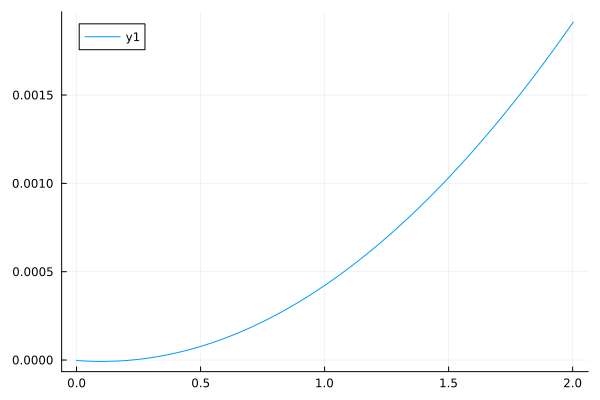

In [10]:
plot(grid, [fp])

In [11]:
v_fwd

6660-element Vector{Float64}:
  1.0010888114611767e-9
  2.004485007367415e-9
  3.0078758616598553e-9
  4.011258711748306e-9
  5.014630894567326e-9
  6.017989747004483e-9
  7.021332606004e-9
  8.024656808362474e-9
  9.027959690999314e-9
  1.0031238590864352e-8
  ⋮
 -0.31457902487143563
 -0.327978258941401
 -0.3419841526647149
 -0.3566257044251891
 -0.3719333684123513
 -0.3879391310627926
 -0.4046765916852665
 -0.42218104750753754
 -0.4404895833970144

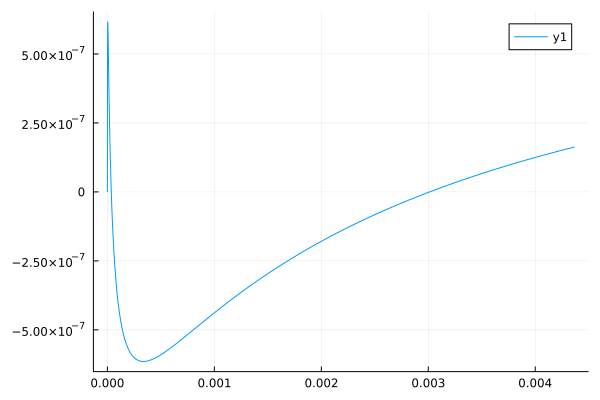

In [16]:
l=4000
plot(grid[1:l], v_fwd[1:l])

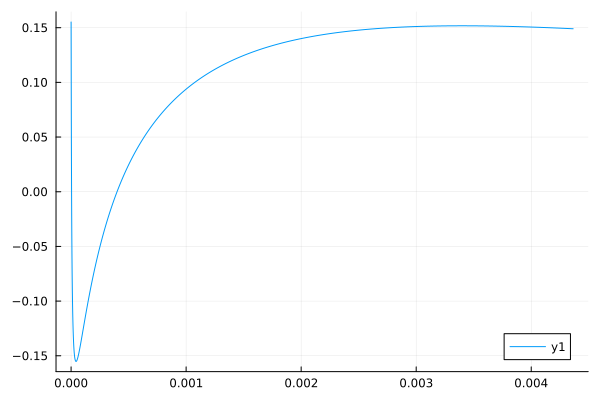

In [17]:
l=4000
plot(grid[1:l], -1.0*v_bwd[1:l])

In [14]:
v_bwd

6660-element Vector{Float64}:
 -0.15417118948817315
 -0.1542003819337513
 -0.15422916349648055
 -0.15425753464698796
 -0.15428549557636867
 -0.1543130463681661
 -0.1543401870536598
 -0.1543669176350562
 -0.15439323809692754
 -0.1544191484125098
  ⋮
  5.739216527451019e-9
  5.491863462851106e-9
  5.25466795985918e-9
  5.0272388129964196e-9
  4.809198975496089e-9
  4.60018512449808e-9
  4.399847159027415e-9
  4.2078477779369265e-9
  4.023862052798186e-9

In [ ]:
u_fwd, u_bwd= odses.solver_regular_expo_grid(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
init_valu2_bwrd, a,b,v_effe,grid,grid_i);
plot(grid[1:6000], [u_fwd[1:7000]])

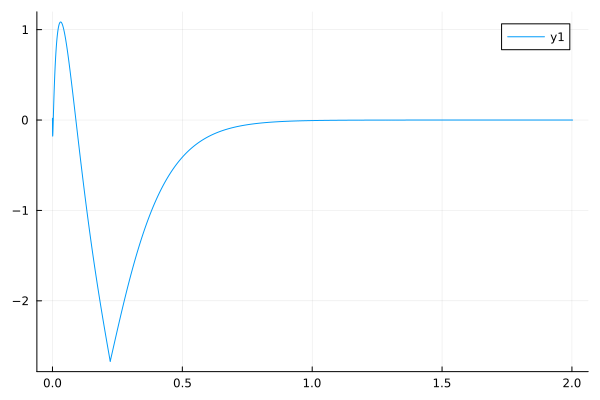

In [7]:
u_merged, merge_value= odses.solver_regular_expo_grid(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
init_valu2_bwrd, a,b,v_effe,grid,grid_i);
plot(grid, u_merged)
#plot(size=(900,400))

# Solution of Schrodinger’s equation of the form 

$\frac{1}{2} \frac{d^2 u}{dr^2} + v_{effe} u = e_i u$

The solver integrates the equation from r_{min} to r_{max} (forward integration) and vice versa (backwards integration). The function returns the integrated function $u$ and the value of the merge of both forward and backwards solutions.

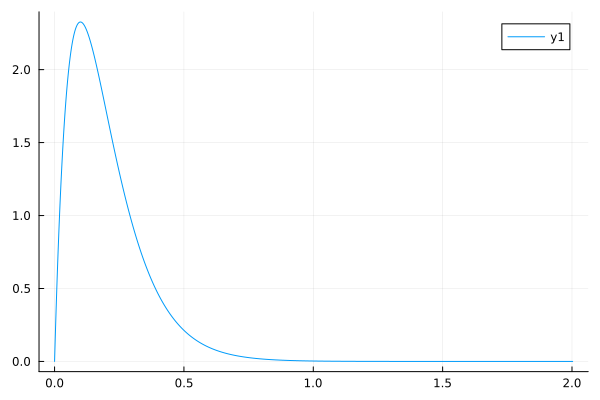

In [14]:


u_merged_o, merge_value_o= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
init_valu2_bwrd, v_effe, grid);
plot(grid, u_merged_o)
#plot(size=(900,400))

In [15]:
v_merged= u_merged_o.*exp.((-0.5*b).*grid_i);

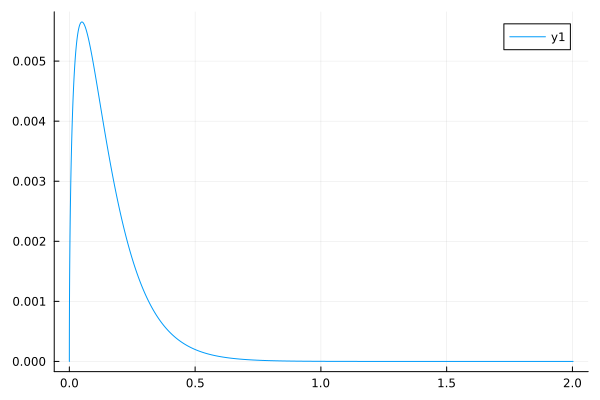

In [16]:
plot(grid, v_merged)